In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [474]:
import requests
import os
import zipfile
import csv
from obspy import read


In [476]:
import random
import ast
from scipy.fft import fft, fftfreq

In [580]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA

# DATA SIMULATION

In [3]:
# Start of data simulation
save_directory = "downloaded_zips" # First Directory
os.makedirs(save_directory, exist_ok=True)

# Base URL with placeholders for latitude and longitude
base_url =("http://service.iris.edu/irisws/syngine/1/query?model=mars_insightkks21gd_2s"
            "&format=saczip&components=ZNE&units=displacement&origintime=2020-01-02T03:04:05"
            "&network=XB&station=ELYSE&sourcelatitude={}&sourcelongitude={}"
            "&sourcedepthinmeters=50000&sourcedoublecouple=310,15,90,1E19&nodata=404")

# Function to generate random latitude and longitude within ±60° range. Simulates region of shadow zone
def generate_random_lat_lon(x_lat,x_lon,num_points=1,delta=60):
    points=[]
    for _ in range(num_points):
        lat=random.uniform(max(-90,x_lat-delta),min(90,x_lat+delta))
        lon=random.uniform(max(-180,x_lon-delta),min(180,x_lon+delta))
        points.append((lat, lon))
    return points


# Latitude and longitude of rover
x_lat = -4.502384
x_lon = -44.376556 

# Download 250 files
num_files=250
for i in range(num_files):
    lat, lon=generate_random_lat_lon(x_lat, x_lon)[0]  # Get one random lat-lon pair
    url=base_url.format(lat, lon)

    try:
        response=requests.get(url, stream=True)
        if response.status_code==200:
            file_path=os.path.join(save_directory,f"data_{i}.zip")
            with open(file_path, "wb") as file:
                for chunk in response.iter_content(chunk_size=1024):
                    file.write(chunk)
            print(f"Downloaded: {file_path}")
        else:
            print(f"Failed to download for Lat: {lat}, Lon: {lon}. Status Code: {response.status_code}")
    except Exception as e:
        print(f"Error downloading file: {e}")

# After downloading, create a parent ZIP file containing all the downloaded zip files.
parent_zip_path="all_downloads.zip"
with zipfile.ZipFile(parent_zip_path, "w", zipfile.ZIP_DEFLATED) as parent_zip:
    for root, dirs, files in os.walk(save_directory):
        for file in files:
            file_full_path=os.path.join(root, file)
            
            # Use arcname to avoid including the full directory structure in the parent zip.
            arcname=os.path.relpath(file_full_path, start=save_directory)
            parent_zip.write(file_full_path, arcname)

print(f"All files have been packaged into {parent_zip_path}")

Downloaded: downloaded_zips\data_0.zip
Downloaded: downloaded_zips\data_1.zip
Downloaded: downloaded_zips\data_2.zip
Downloaded: downloaded_zips\data_3.zip
Downloaded: downloaded_zips\data_4.zip
Downloaded: downloaded_zips\data_5.zip
Downloaded: downloaded_zips\data_6.zip
Downloaded: downloaded_zips\data_7.zip
Downloaded: downloaded_zips\data_8.zip
Downloaded: downloaded_zips\data_9.zip
Downloaded: downloaded_zips\data_10.zip
Downloaded: downloaded_zips\data_11.zip
Downloaded: downloaded_zips\data_12.zip
Downloaded: downloaded_zips\data_13.zip
Downloaded: downloaded_zips\data_14.zip
Downloaded: downloaded_zips\data_15.zip
Downloaded: downloaded_zips\data_16.zip
Downloaded: downloaded_zips\data_17.zip
Downloaded: downloaded_zips\data_18.zip
Downloaded: downloaded_zips\data_19.zip
Downloaded: downloaded_zips\data_20.zip
Downloaded: downloaded_zips\data_21.zip
Downloaded: downloaded_zips\data_22.zip
Downloaded: downloaded_zips\data_23.zip
Downloaded: downloaded_zips\data_24.zip
Downloaded

In [5]:
save_directory = "downloaded_zips2" #Second directory
os.makedirs(save_directory, exist_ok=True)

# Base URL with placeholders for latitude and longitude
base_url = ("http://service.iris.edu/irisws/syngine/1/query?model=mars_insightkks21gd_2s"
            "&format=saczip&components=ZNE&units=displacement&origintime=2020-01-02T03:04:05"
            "&network=XB&station=ELYSE&sourcelatitude={}&sourcelongitude={}"
            "&sourcedepthinmeters=50000&sourcedoublecouple=310,15,90,1E19&nodata=404")

# Function to generate random latitude and longitude within ±80° range. Simulates region of non-shadow zone
def generate_random_lat_lon(x_lat, x_lon, num_points=1, delta=80):
    points = []
    for _ in range(num_points):
        lat = random.uniform(max(-90, x_lat-delta),min(90, x_lat+delta))
        lon = random.uniform(max(-180, x_lon-delta),min(180, x_lon+delta))
        points.append((lat,lon))
    return points

# Latitude and longitude of rover
x_lat = 4.502384 
x_lon = 135.623444  

# Download 300 files
num_files=300
for i in range(num_files):
    lat, lon=generate_random_lat_lon(x_lat, x_lon)[0]  # Get one random lat-lon pair
    url=base_url.format(lat, lon)

    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            file_path = os.path.join(save_directory, f"data_{i}.zip")
            with open(file_path, "wb") as file:
                for chunk in response.iter_content(chunk_size=1024):
                    file.write(chunk)
            print(f"Downloaded: {file_path}")
        else:
            print(f"Failed to download for Lat: {lat}, Lon: {lon}. Status Code: {response.status_code}")
    except Exception as e:
        print(f"Error downloading file: {e}")

# After downloading, create a parent ZIP file containing all the downloaded zip files.
parent_zip_path = "all_downloads2.zip"
with zipfile.ZipFile(parent_zip_path, "w", zipfile.ZIP_DEFLATED) as parent_zip:
    for root, dirs, files in os.walk(save_directory):
        for file in files:
            file_full_path = os.path.join(root, file)
            
            # Use arcname to avoid including the full directory structure in the parent zip.
            arcname = os.path.relpath(file_full_path, start=save_directory)
            parent_zip.write(file_full_path, arcname)

print(f"All files have been packaged into {parent_zip_path}")

Downloaded: downloaded_zips2\data_0.zip
Downloaded: downloaded_zips2\data_1.zip
Downloaded: downloaded_zips2\data_2.zip
Downloaded: downloaded_zips2\data_3.zip
Downloaded: downloaded_zips2\data_4.zip
Downloaded: downloaded_zips2\data_5.zip
Downloaded: downloaded_zips2\data_6.zip
Downloaded: downloaded_zips2\data_7.zip
Downloaded: downloaded_zips2\data_8.zip
Downloaded: downloaded_zips2\data_9.zip
Downloaded: downloaded_zips2\data_10.zip
Downloaded: downloaded_zips2\data_11.zip
Downloaded: downloaded_zips2\data_12.zip
Downloaded: downloaded_zips2\data_13.zip
Downloaded: downloaded_zips2\data_14.zip
Downloaded: downloaded_zips2\data_15.zip
Downloaded: downloaded_zips2\data_16.zip
Downloaded: downloaded_zips2\data_17.zip
Downloaded: downloaded_zips2\data_18.zip
Downloaded: downloaded_zips2\data_19.zip
Downloaded: downloaded_zips2\data_20.zip
Downloaded: downloaded_zips2\data_21.zip
Downloaded: downloaded_zips2\data_22.zip
Downloaded: downloaded_zips2\data_23.zip
Downloaded: downloaded_zip

# Unzipping files and creating CSV
Each file has 3 .sac displacement amplitude files. Each file corresponds to one row in the csv file: time, displacement1, displacement2, displacement3 and Class, which is the classification.
0 corresponds to Shadow zone
1 corresponds to Non-Shadow zone

In [11]:
base_path = "downloaded_zips"

# Creating new csv file
with open("Data.csv", "w", newline="") as file:
    writer=csv.writer(file)
    
    header=["Index", "Time", "displacement1", "displacement2", "displacement3", "Class"]
    writer.writerow(header)

    # Unzipping all 250 files of first directory
    for i in range(250):
        zip_path = os.path.join(base_path, f"data_{i}.zip")
        extract_path = os.path.join(base_path, f"data_{i}_extracted")

        # Ensure ZIP file exists
        if not os.path.exists(zip_path):
            print(f"ZIP file not found: {zip_path}")
            continue 
        
        # Extract ZIP file if it hasn't been extracted already
        if not os.path.exists(extract_path):
            os.makedirs(extract_path, exist_ok=True) 
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_path)  # Extract files
        
        # Read SAC files from extracted folder
        try:
            st1 = read(os.path.join(extract_path, "XB.ELYSE.SE.MXE.sac"))
            tr1 = st1[0]
            data1 = list(tr1.data) 
            times = list(tr1.times()) 

            st2 = read(os.path.join(extract_path, "XB.ELYSE.SE.MXN.sac"))
            tr2 = st2[0]
            data2 = list(tr2.data)  

            st3 = read(os.path.join(extract_path, "XB.ELYSE.SE.MXZ.sac"))
            tr3 = st3[0]
            data3 = list(tr3.data) 

            # Write each row: index is i, and class is '0', i.e Shadow
            writer.writerow([i, times, data1, data2, data3, "0"])

        except Exception as e:
            print(f"Error reading SAC files in {extract_path}: {e}")


In [13]:
base_path = "downloaded_zips2"

# Opening the same csv with append mode
with open("Data.csv", "a", newline="") as file:
    writer = csv.writer(file)
    
    # Unzipping all 300 files of first directory
    for i in range(300):
        zip_path = os.path.join(base_path, f"data_{i}.zip")
        extract_path = os.path.join(base_path, f"data_{i}_extracted")

        # Ensure ZIP file exists
        if not os.path.exists(zip_path):
            print(f"ZIP file not found: {zip_path}")
            continue 
        
        # Extract ZIP file if it hasn't been extracted already
        if not os.path.exists(extract_path):
            os.makedirs(extract_path, exist_ok=True)  
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_path)  # Extract files
        
        # Read SAC files from extracted folder
        try:
            st1 = read(os.path.join(extract_path, "XB.ELYSE.SE.MXE.sac"))
            tr1 = st1[0]
            data1 = list(tr1.data) 
            times = list(tr1.times()) 

            st2 = read(os.path.join(extract_path, "XB.ELYSE.SE.MXN.sac"))
            tr2 = st2[0]
            data2 = list(tr2.data)  

            st3 = read(os.path.join(extract_path, "XB.ELYSE.SE.MXZ.sac"))
            tr3 = st3[0]
            data3 = list(tr3.data)  

            # Write each row: index is i+250, and class is '1', i.e Non-Shadow
            writer.writerow([i+250, times, data1, data2, data3, "1"])

        except Exception as e:
            print(f"Error reading SAC files in {extract_path}: {e}")


# Surfing and plotting the created data file

In [457]:
df=pd.read_csv("Data.csv")
df=df.sample(frac=1).reset_index(drop=True)
df

,Index,Time,displacement1,displacement2,displacement3,Class
0,444,"[0.0, 0.4720000153045659, 0.9440000306091318, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,252,"[0.0, 0.4720000153045659, 0.9440000306091318, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
2,134,"[0.0, 0.4720000153045659, 0.9440000306091318, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,32,"[0.0, 0.4720000153045659, 0.9440000306091318, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,472,"[0.0, 0.4720000153045659, 0.9440000306091318, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
...,...,...,...,...,...,...
545,177,"[0.0, 0.4720000153045659, 0.9440000306091318, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
546,393,"[0.0, 0.4720000153045659, 0.9440000306091318, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
547,137,"[0.0, 0.4720000153045659, 0.9440000306091318, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
548,542,"[0.0, 0.4720000153045659, 0.9440000306091318, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [459]:
df.dtypes

Index             int64
Time             object
displacement1    object
displacement2    object
displacement3    object
Class             int64
dtype: object

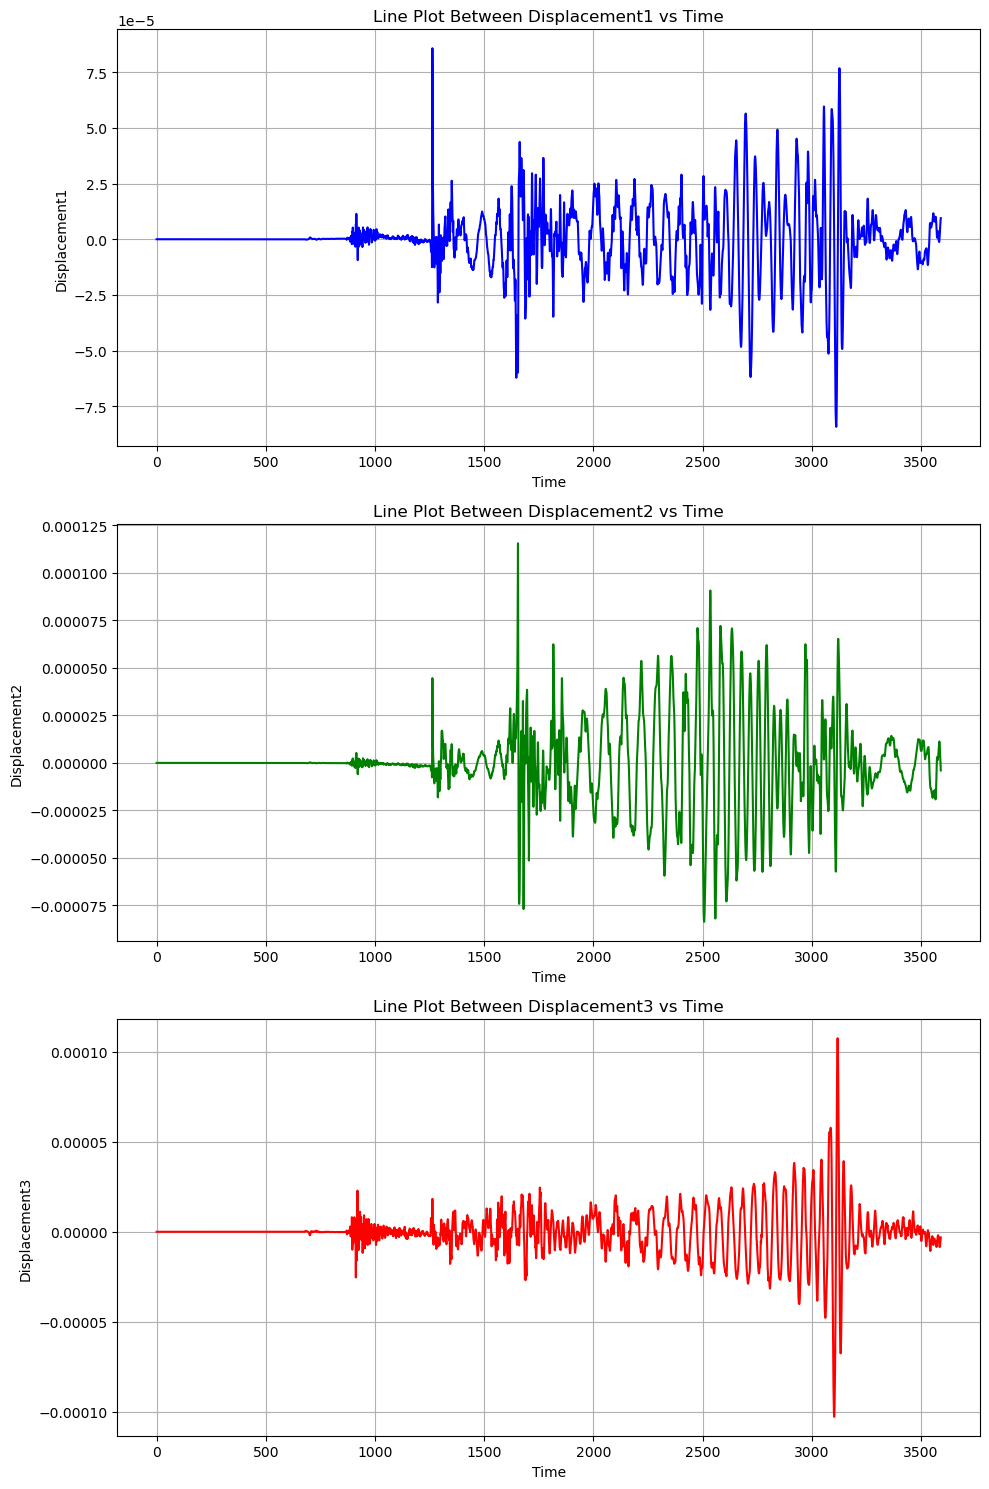

In [461]:
# Plot of displacement vs time of each axis for one of the rows

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Displacement1 vs Time
axs[0].plot(ast.literal_eval(df.iloc[:, 1][280]), ast.literal_eval(df.iloc[:, 2][280]), color='b')
axs[0].set_title('Line Plot Between Displacement1 vs Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Displacement1')
axs[0].grid(True)

# Plot Displacement2 vs Time
axs[1].plot(ast.literal_eval(df.iloc[:, 1][280]), ast.literal_eval(df.iloc[:, 3][280]), color='g')
axs[1].set_title('Line Plot Between Displacement2 vs Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Displacement2')
axs[1].grid(True)

# Plot Displacement3 vs Time
axs[2].plot(ast.literal_eval(df.iloc[:, 1][280]), ast.literal_eval(df.iloc[:, 4][280]), color='r')
axs[2].set_title('Line Plot Between Displacement3 vs Time')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Displacement3')
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Creating features from existing columns
Here, Dominant Frequency and Max, Min, Mean and Range(Max-Min) of each displacement axis(1,2,3) are created as new columns

In [463]:
# Convert object representations of lists back to actual lists
df["displacement1"] = df["displacement1"].apply(ast.literal_eval)
df["displacement2"] = df["displacement2"].apply(ast.literal_eval)
df["displacement3"] = df["displacement3"].apply(ast.literal_eval)

# Function to compute dominant frequency
def get_dominant_frequency(data_array, sampling_rate=2.1):
    N=len(data_array) 
    fft_values=np.abs(fft(data_array))[:N//2]  # Compute FFT and take magnitude (first half)
    freqs = fftfreq(N, d=sampling_rate)[:N//2]  # Compute frequency bins
    dominant_freq = freqs[np.argmax(fft_values)]  # Find dominant frequency
    return dominant_freq

# Function to compute RMS value
def get_rms(data_array):
    return np.sqrt(np.mean(np.square(data_array)))  # Root Mean Square

# Function to compute Max, Min, Range (Max - Min), and Mean
def get_stats(data_array):
    max_val = np.max(data_array)
    min_val = np.min(data_array)
    range_val = max_val - min_val
    mean_val = np.mean(data_array)
    return max_val, min_val, range_val, mean_val

# Apply functions to each row
df["dom_freq1"] = df["displacement1"].apply(get_dominant_frequency)
df["dom_freq2"] = df["displacement2"].apply(get_dominant_frequency)
df["dom_freq3"] = df["displacement3"].apply(get_dominant_frequency)

df["rms1"] = df["displacement1"].apply(get_rms)
df["rms2"] = df["displacement2"].apply(get_rms)
df["rms3"] = df["displacement3"].apply(get_rms)

df[["max1", "min1", "range1", "mean1"]] = df["displacement1"].apply(lambda x: pd.Series(get_stats(x)))
df[["max2", "min2", "range2", "mean2"]] = df["displacement2"].apply(lambda x: pd.Series(get_stats(x)))
df[["max3", "min3", "range3", "mean3"]] = df["displacement3"].apply(lambda x: pd.Series(get_stats(x)))

# Keep the Class column from the original file
df["Class"] = df["Class"]
df.to_csv("Data_processed.csv", index=False)




In [465]:
df.dtypes

Index              int64
Time              object
displacement1     object
displacement2     object
displacement3     object
Class              int64
dom_freq1        float64
dom_freq2        float64
dom_freq3        float64
rms1             float64
rms2             float64
rms3             float64
max1             float64
min1             float64
range1           float64
mean1            float64
max2             float64
min2             float64
range2           float64
mean2            float64
max3             float64
min3             float64
range3           float64
mean3            float64
dtype: object

In [467]:
df.columns

Index(['Index', 'Time', 'displacement1', 'displacement2', 'displacement3',
       'Class', 'dom_freq1', 'dom_freq2', 'dom_freq3', 'rms1', 'rms2', 'rms3',
       'max1', 'min1', 'range1', 'mean1', 'max2', 'min2', 'range2', 'mean2',
       'max3', 'min3', 'range3', 'mean3'],
      dtype='object')

In [469]:
df.describe()

,Index,Class,dom_freq1,dom_freq2,dom_freq3,rms1,rms2,rms3,max1,min1,range1,mean1,max2,min2,range2,mean2,max3,min3,range3,mean3
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02,550.000000,550.000000,550.000000,5.500000e+02,550.000000,550.000000,550.000000,5.500000e+02
mean,274.500000,0.545455,0.004412,0.004639,0.005323,0.000031,0.000034,0.000033,0.000275,-0.000265,0.000540,1.187899e-07,0.000285,-0.000301,0.000586,2.461151e-07,0.000302,-0.000296,0.000598,-8.675240e-08
std,158.915596,0.498383,0.001212,0.001302,0.000719,0.000022,0.000024,0.000025,0.000403,0.000362,0.000753,2.605101e-06,0.000424,0.000515,0.000914,3.746188e-06,0.000407,0.000361,0.000761,8.152093e-07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,0.000011,0.000009,0.000028,-0.004706,0.000062,-9.776681e-06,0.000053,-0.008546,0.000105,-1.662202e-05,0.000034,-0.004741,0.000071,-8.755112e-06
25%,137.250000,0.000000,0.003881,0.004194,0.004883,0.000020,0.000022,0.000019,0.000112,-0.000299,0.000222,-3.344076e-07,0.000121,-0.000313,0.000245,-5.861654e-07,0.000127,-0.000335,0.000250,-3.649462e-07
50%,274.500000,1.000000,0.004570,0.004883,0.005446,0.000027,0.000029,0.000029,0.000174,-0.000169,0.000345,2.025080e-08,0.000182,-0.000196,0.000382,-5.437630e-08,0.000217,-0.000211,0.000428,-1.198544e-07
75%,411.750000,1.000000,0.005133,0.005446,0.005869,0.000033,0.000038,0.000039,0.000294,-0.000109,0.000580,2.970815e-07,0.000301,-0.000121,0.000604,4.206704e-07,0.000338,-0.000121,0.000678,4.027339e-07
max,549.000000,1.000000,0.007136,0.007011,0.006761,0.000272,0.000268,0.000255,0.005135,-0.000031,0.009842,3.898484e-05,0.005600,-0.000052,0.012067,4.290817e-05,0.006952,-0.000035,0.011694,8.716794e-07


# Logistic Regression

In [700]:
# Dividing columns into four sections

rqd_cols1=['dom_freq1','rms1','range1','mean1']
rqd_cols2=['dom_freq2','rms2','range2','mean2']
rqd_cols3=['dom_freq3','rms3','range3','mean3']
rqd_cols=['dom_freq1', 'dom_freq2', 'dom_freq3', 'rms1', 'rms2', 'rms3',
      'range1', 'mean1','range2', 'mean2',
       'range3', 'mean3']

In [610]:
# Logistic regression on first axis, displacement1

X1=df[rqd_cols1]
y1=df['Class']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=42)
# Scale the features
scaler=StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

logreg=LogisticRegression(penalty='l1',solver='saga',random_state=42,max_iter=1000,l1_ratio=0.1)
logreg.fit(X_train_scaled1, y_train1)

y_pred1 = logreg.predict(X_test_scaled1)
y_pred_proba1 = logreg.predict_proba(X_test_scaled1)[:, 1]

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test1, y_pred1))

Accuracy Score: 0.8848484848484849


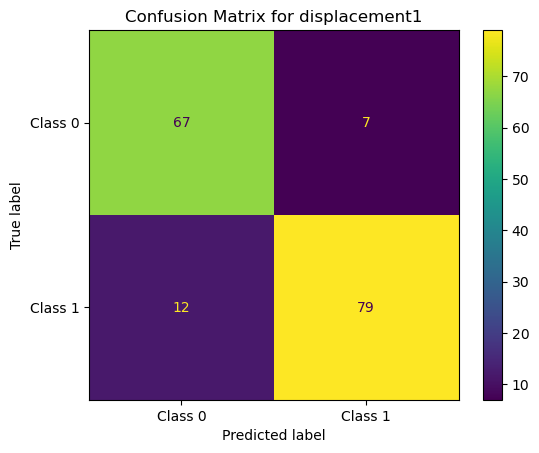

In [612]:
# Confusion Matrix for displacement1
cm = confusion_matrix(y_true1, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for displacement1')
plt.show()

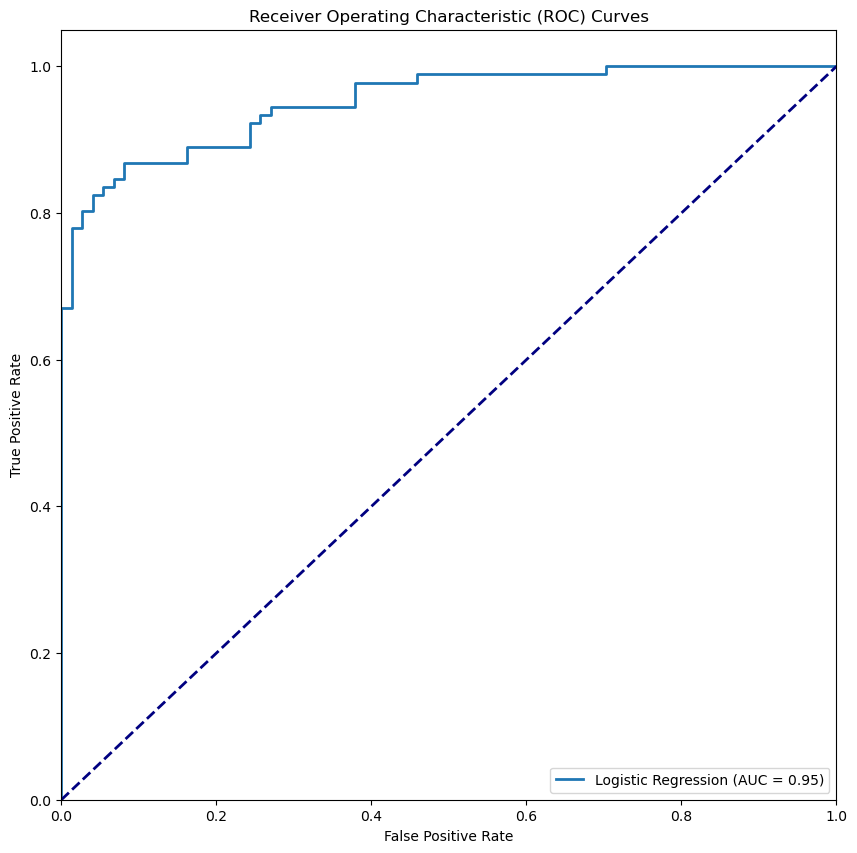

In [614]:
#ROC-AUC details for first classification

models_predictions = {
    "Logistic Regression": (y_test1, y_pred_proba1),
}

plt.figure(figsize=(10, 10))

for model_name, (y_true1, y_proba1) in models_predictions.items():
    fpr, tpr, _ = roc_curve(y_true1, y_proba1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [584]:
# Logistic regression for second axis, displacement2

X2=df[rqd_cols2]
y2=df['Class']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.15, random_state=42)
# Scale the features
scaler=StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

logreg=LogisticRegression(random_state=42,max_iter=10000)
logreg.fit(X_train_scaled2, y_train2)

y_pred2 = logreg.predict(X_test_scaled2)
y_pred_proba2 = logreg.predict_proba(X_test_scaled2)[:, 1]

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test2, y_pred2))


Accuracy Score: 0.891566265060241


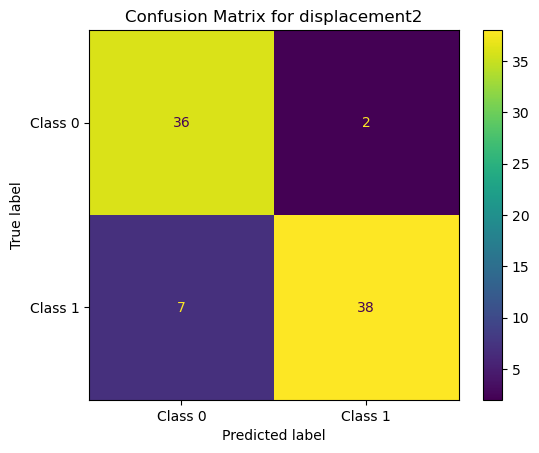

In [606]:
# Confusion Matrix for second classification

cm = confusion_matrix(y_true2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for displacement2')
plt.show()

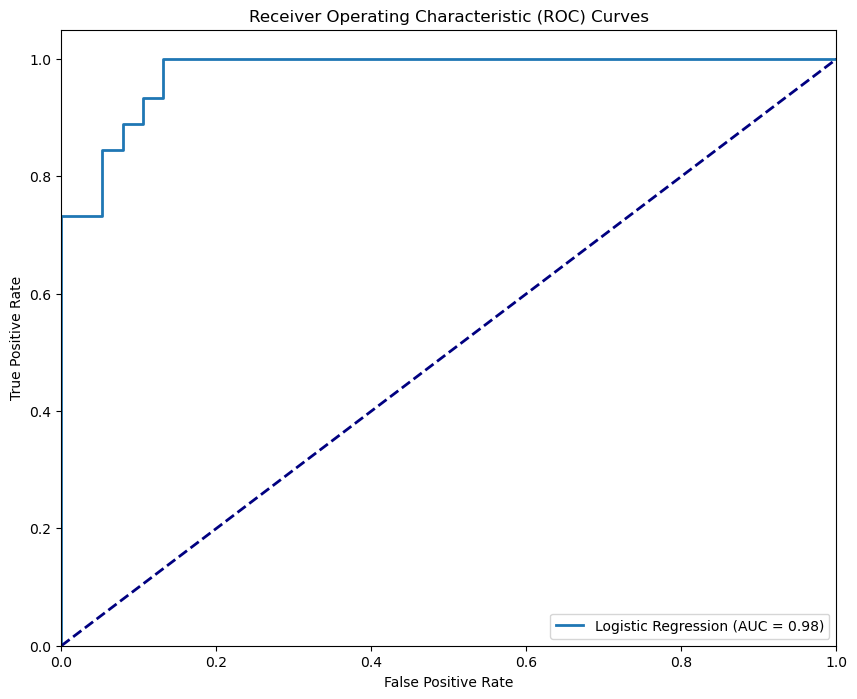

In [608]:
# ROC-AUC for this classification

models_predictions = {
    "Logistic Regression": (y_test2, y_pred_proba2),
}

plt.figure(figsize=(10, 8))

for model_name, (y_true2, y_proba2) in models_predictions.items():
    fpr, tpr, _ = roc_curve(y_true2, y_proba2)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [596]:
# Logistic regression for third axis, displacement3

X3=df[rqd_cols3]
y3=df['Class']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=12)
# Scale the features
scaler=StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

logreg=LogisticRegression(random_state=42,max_iter=10000)
logreg.fit(X_train_scaled3, y_train3)

y_pred3 = logreg.predict(X_test_scaled3)
y_pred_proba3 = logreg.predict_proba(X_test_scaled3)[:, 1]

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test3, y_pred3))

Accuracy Score: 0.9727272727272728


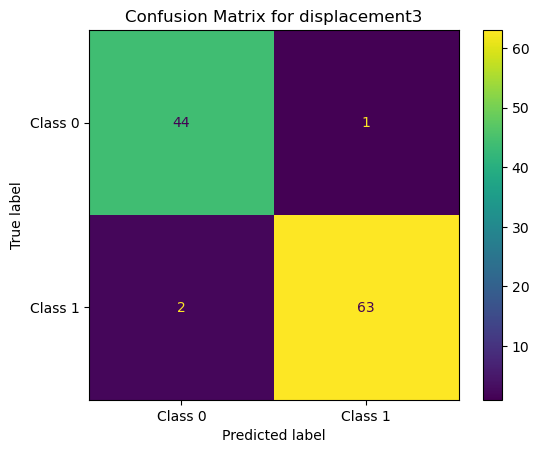

In [598]:
# Confusion Matrix

cm = confusion_matrix(y_true3, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for displacement3')
plt.show()

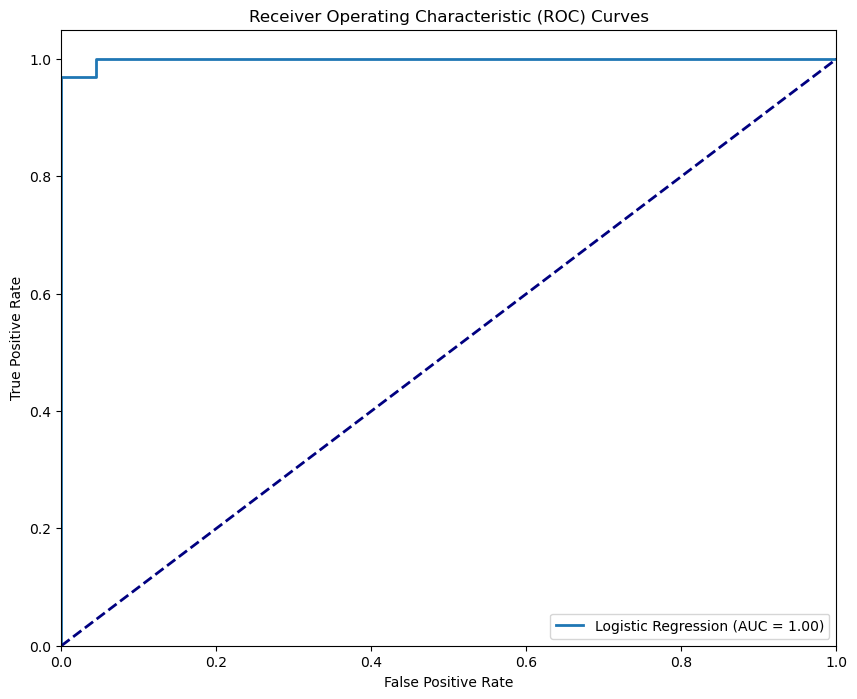

In [576]:
# ROC-AUC for this classification

models_predictions = {
    "Logistic Regression": (y_test3, y_pred_proba3),
}

plt.figure(figsize=(10, 8))

for model_name, (y_true3, y_proba3) in models_predictions.items():
    fpr, tpr, _ = roc_curve(y_true3, y_proba3)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


# Support Vector Machine(SVM)

In [654]:
# Calling linear SVM

support = svm.LinearSVC(random_state=42)

In [709]:
# SVM for first axis, displacement1

X_svm1=df[rqd_cols1]
y_svm1=df['Class']
X_train_svm1, X_test_svm1, y_train_svm1, y_test_svm1 = train_test_split(X_svm1, y_svm1, test_size=0.35, random_state=16)
scaler = StandardScaler()
X_train_scaled_svm1 = scaler.fit_transform(X_train_svm1)
X_test_scaled_svm1 = scaler.transform(X_test_svm1)

support.fit(X_train_scaled_svm1, y_train_svm1)
predicted1= support.predict(X_test_scaled_svm1)
score=accuracy_score(y_test_svm1,predicted1)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.9222797927461139


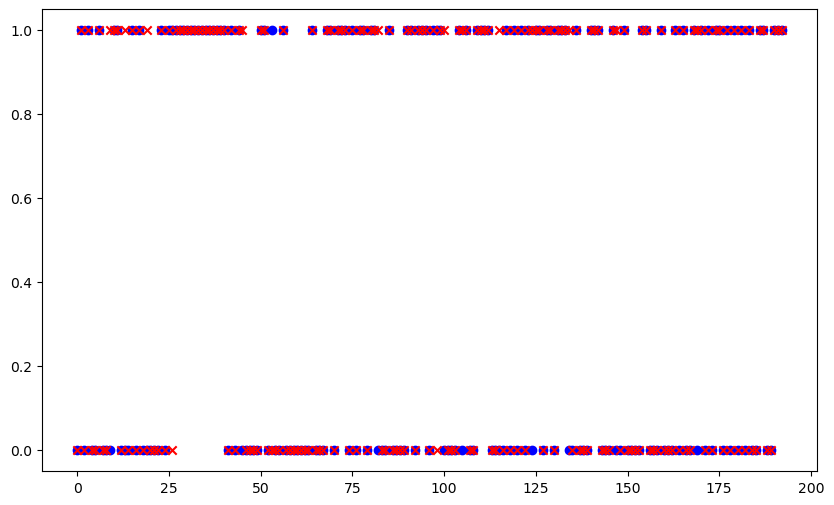

In [727]:
# Prediction vs test data points

plt.figure(figsize=(10, 6))
x = np.arange(len(predicted1))
plt.scatter(x, predicted1, color='blue', marker='o')
plt.scatter(x, y_test_svm1, color='red', marker='x')
plt.show()

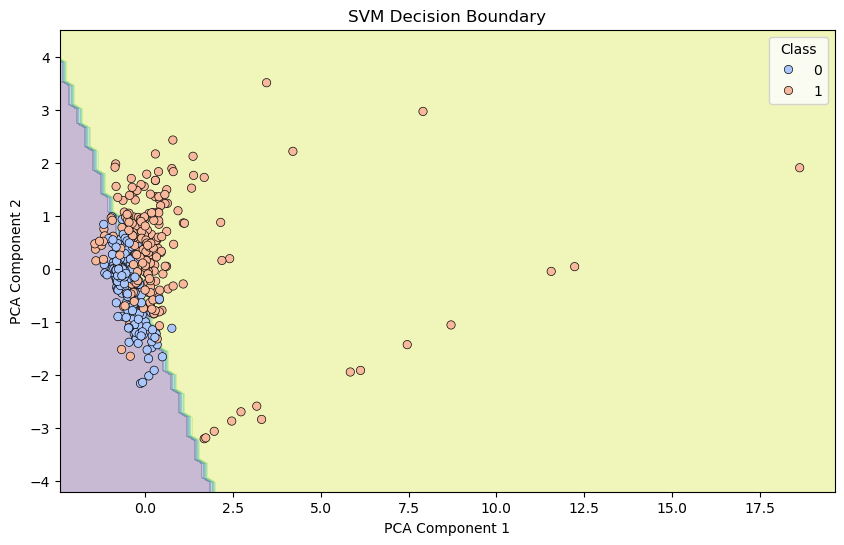

In [739]:
# SVM Decision Boundary for this classification

X = df[rqd_cols1]
y = df['Class']

# Drop missing values if any
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches X after dropping missing values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Standardize the data
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

# Ensure matching samples before PCA
if len(X_train_scaled2) != len(y_train):
    print("Mismatch detected after standardization. Fixing...")
    X_train_scaled2 = X_train_scaled2[:len(y_train)]  # Adjust size

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled2)
X_test_pca = pca.transform(X_test_scaled2)

# Ensure consistency
if len(X_train_pca) != len(y_train):
    print("Mismatch detected after PCA. Fixing...")
    X_train_pca = X_train_pca[:len(y_train)]  # Adjust size

# Train SVM model
svm_model = SVC(kernel='linear', random_state=20)
svm_model.fit(X_train_pca, y_train)

# Create a mesh to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary')
plt.show()


In [711]:
# SVM for second axis, displacement2

X_svm2=df[rqd_cols2]
y_svm2=df['Class']
X_train_svm2, X_test_svm2, y_train_svm2, y_test_svm2 = train_test_split(X_svm2, y_svm2, test_size=0.15, random_state=16)
scaler = StandardScaler()
X_train_scaled_svm2 = scaler.fit_transform(X_train_svm2)
X_test_scaled_svm2 = scaler.transform(X_test_svm2)

support.fit(X_train_scaled_svm2, y_train_svm2)
predicted2= support.predict(X_test_scaled_svm2)
score=accuracy_score(y_test_svm2,predicted2)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.9518072289156626


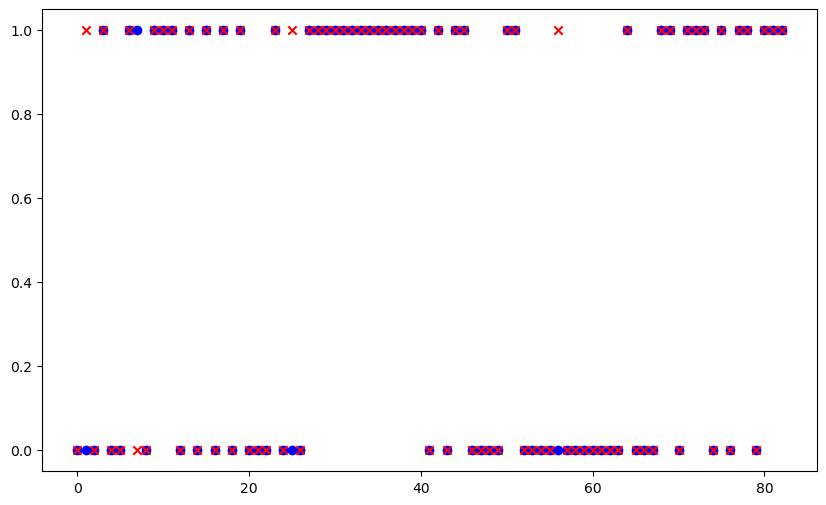

In [725]:
# Prediction vs test data points

plt.figure(figsize=(10, 6))
x = np.arange(len(predicted2))
plt.scatter(x, predicted2, color='blue', marker='o')
plt.scatter(x, y_test_svm2, color='red', marker='x')
plt.show()

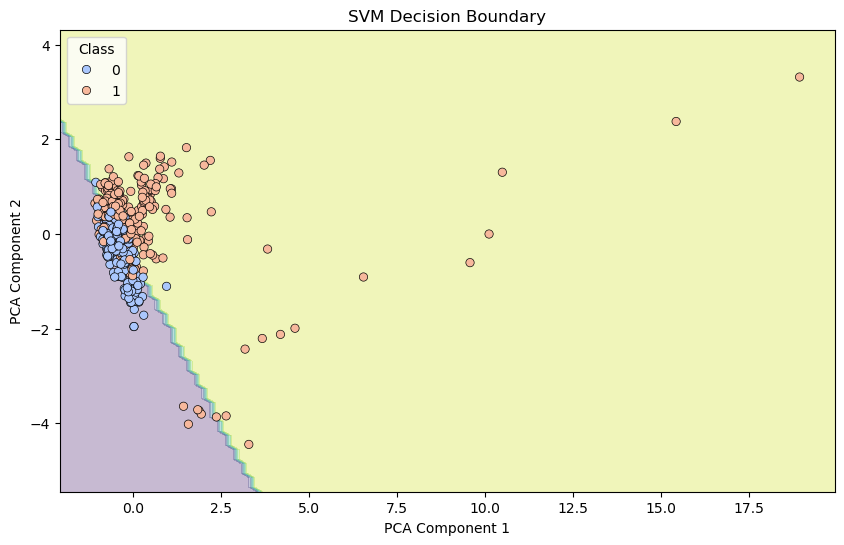

In [737]:
# SVM Decision Boundary for this classification

X = df[rqd_cols2]
y = df['Class']

# Drop missing values if any
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches X after dropping missing values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Standardize the data
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

# Ensure matching samples before PCA
if len(X_train_scaled2) != len(y_train):
    print("Mismatch detected after standardization. Fixing...")
    X_train_scaled2 = X_train_scaled2[:len(y_train)]  # Adjust size

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled2)
X_test_pca = pca.transform(X_test_scaled2)

# Ensure consistency
if len(X_train_pca) != len(y_train):
    print("Mismatch detected after PCA. Fixing...")
    X_train_pca = X_train_pca[:len(y_train)]  # Adjust size

# Train SVM model
svm_model = SVC(kernel='linear', random_state=20)
svm_model.fit(X_train_pca, y_train)

# Create a mesh to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary')
plt.show()


In [713]:
# SVM for third axis, displacement3

X_svm3=df[rqd_cols3]
y_svm3=df['Class']
X_train_svm3, X_test_svm3, y_train_svm3, y_test_svm3 = train_test_split(X_svm3, y_svm3, test_size=0.35, random_state=16)
scaler = StandardScaler()
X_train_scaled_svm3 = scaler.fit_transform(X_train_svm3)
X_test_scaled_svm3 = scaler.transform(X_test_svm3)

support.fit(X_train_scaled_svm3, y_train_svm3)
predicted3= support.predict(X_test_scaled_svm3)
score=accuracy_score(y_test_svm3,predicted3)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.9792746113989638


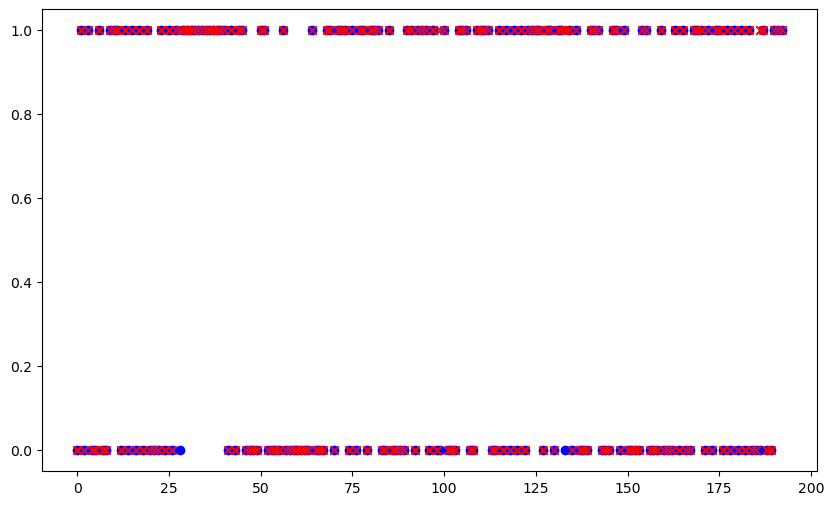

In [723]:
# Predicted vs Test data points

plt.figure(figsize=(10, 6))
x = np.arange(len(predicted3))
plt.scatter(x, predicted3, color='blue', marker='o')
plt.scatter(x, y_test_svm3, color='red', marker='x')
plt.show()

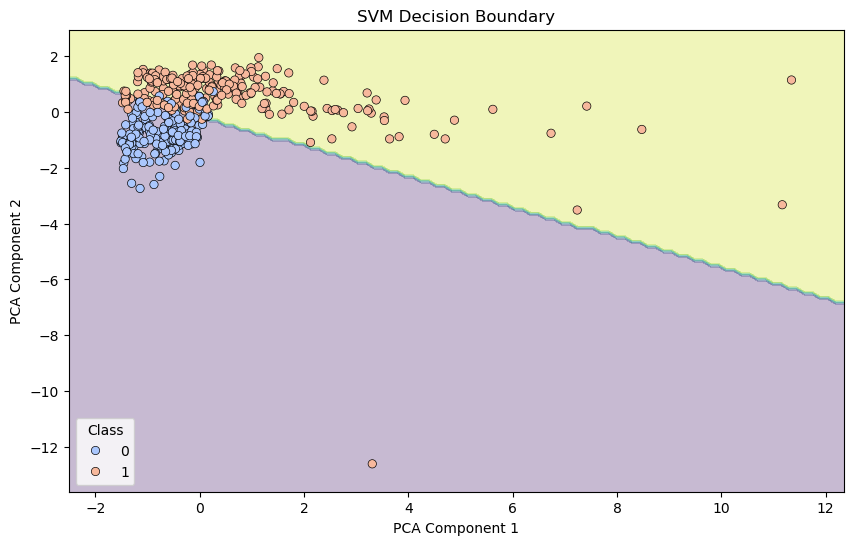

In [735]:
# SVM Decision Boundary for this classification

X = df[rqd_cols3]
y = df['Class']

# Drop missing values if any
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches X after dropping missing values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Standardize the data
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

# Ensure matching samples before PCA
if len(X_train_scaled2) != len(y_train):
    print("Mismatch detected after standardization. Fixing...")
    X_train_scaled2 = X_train_scaled2[:len(y_train)]  # Adjust size

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled2)
X_test_pca = pca.transform(X_test_scaled2)

# Ensure consistency
if len(X_train_pca) != len(y_train):
    print("Mismatch detected after PCA. Fixing...")
    X_train_pca = X_train_pca[:len(y_train)]  # Adjust size

# Train SVM model
svm_model = SVC(kernel='linear', random_state=20)
svm_model.fit(X_train_pca, y_train)

# Create a mesh to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary')
plt.show()


In [706]:
# SVM considering all three axis features

X_svm4=df[rqd_cols]
y_svm4=df['Class']
X_train_svm4, X_test_svm4, y_train_svm4, y_test_svm4 = train_test_split(X_svm4, y_svm4, test_size=0.85, random_state=16)
scaler = StandardScaler()
X_train_scaled_svm4 = scaler.fit_transform(X_train_svm4)
X_test_scaled_svm4 = scaler.transform(X_test_svm4)

support.fit(X_train_scaled_svm4, y_train_svm4)
predicted4= support.predict(X_test_scaled_svm4)
score=accuracy_score(y_test_svm4,predicted4)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.9829059829059829


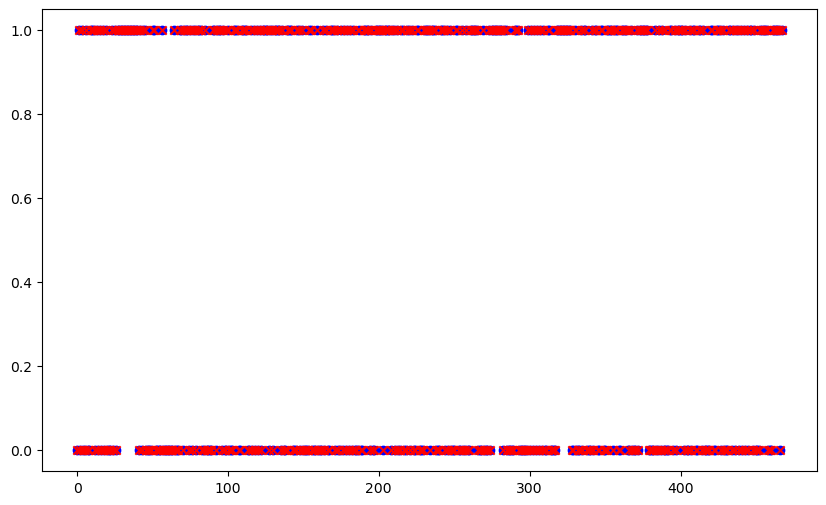

In [721]:
# Predicted vs Test data points

plt.figure(figsize=(10, 6))
x = np.arange(len(predicted4))
plt.scatter(x, predicted4, color='blue', marker='o')
plt.scatter(x, y_test_svm4, color='red', marker='x')
plt.show()

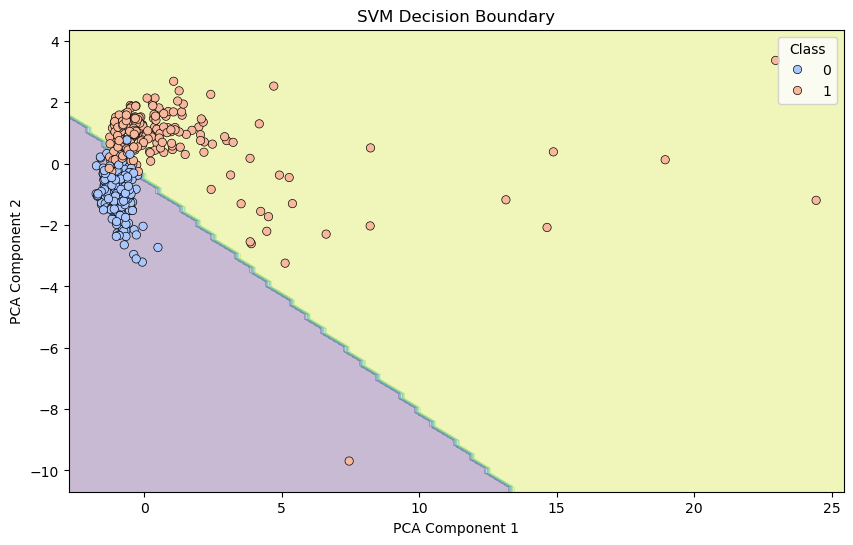

In [733]:
# SVM Decision Boundary for this classification

X = df[rqd_cols]
y = df['Class']

# Drop missing values if any
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches X after dropping missing values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Standardize the data
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

# Ensure matching samples before PCA
if len(X_train_scaled2) != len(y_train):
    print("Mismatch detected after standardization. Fixing...")
    X_train_scaled2 = X_train_scaled2[:len(y_train)]  # Adjust size

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled2)
X_test_pca = pca.transform(X_test_scaled2)

# Ensure consistency
if len(X_train_pca) != len(y_train):
    print("Mismatch detected after PCA. Fixing...")
    X_train_pca = X_train_pca[:len(y_train)]  # Adjust size

# Train SVM model
svm_model = SVC(kernel='linear', random_state=20)
svm_model.fit(X_train_pca, y_train)

# Create a mesh to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary')
plt.show()


In [771]:
# Splitting data into test, train and validation

support = svm.LinearSVC(random_state=40)
X = df[rqd_cols]
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.80, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.95, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions on validation set
lr_val_pred = lr_model.predict(X_val_scaled)
print("Logistic Regression - Validation Set:")
print("Accuracy:", accuracy_score(y_val, lr_val_pred))

# Predictions on test set
lr_test_pred = lr_model.predict(X_test_scaled)
print("\nLogistic Regression - Test Set:")
print("Accuracy:", accuracy_score(y_test, lr_test_pred))

# SVM
support.fit(X_train_scaled, y_train)

# Predictions on validation set
svm_val_pred = support.predict(X_val_scaled)
print("\nSVM - Validation Set:")
print("Accuracy:", accuracy_score(y_val, svm_val_pred))

# Predictions on test set
svm_test_pred = support.predict(X_test_scaled)
print("\nSVM - Test Set:")
print("Accuracy:", accuracy_score(y_test, svm_test_pred))


Logistic Regression - Validation Set:
Accuracy: 1.0

Logistic Regression - Test Set:
Accuracy: 0.992822966507177

SVM - Validation Set:
Accuracy: 1.0

SVM - Test Set:
Accuracy: 0.9976076555023924
